#Memory /Model Based Colabrative Filtering

**Exploratory Data Analysis**

We first import the relevant libraries.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

Reading the dataset with appropriate columns and printing its first few columns

In [ ]:
columns = ['productID', 'userID', 'ratings','timestamp']
recomm_df1 = pd.read_csv('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Movies_and_TV.csv',names=columns)
# https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Electronics.json.gz
# http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
# http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Movies_and_TV.csv

In [ ]:
recomm_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607047 entries, 0 to 4607046
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   productID  object 
 1   userID     object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 140.6+ MB


Removing 'timestamp' column as it is not relevant to us

In [ ]:
df1 = recomm_df1.head(20000)

In [ ]:
df1.head(10)

,productID,userID,ratings,timestamp
0,A3R5OBKS7OM2IR,0000143502,5.0,1358380800
1,A3R5OBKS7OM2IR,0000143529,5.0,1380672000
2,AH3QC2PC1VTGP,0000143561,2.0,1216252800
3,A3LKP6WPMP9UKX,0000143588,5.0,1236902400
4,AVIY68KEPQ5ZD,0000143588,5.0,1232236800
5,A1CV1WROP5KTTW,0000589012,5.0,1309651200
6,AP57WZ2X4G0AA,0000589012,2.0,1366675200
7,A3NMBJ2LCRCATT,0000589012,5.0,1393804800
8,A5Y15SAOMX6XA,0000589012,2.0,1307404800
9,A3P671HJ32TCSF,0000589012,5.0,1393718400


In [ ]:
df = df1.drop('timestamp', axis=1)

The following command gives details about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   productID  20000 non-null  object 
 1   userID     20000 non-null  object 
 2   ratings    20000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 468.9+ KB


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
lst1 = list(df["productID"].values)
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(lst1)
sequences = tokenizer1.texts_to_sequences(lst1)

In [ ]:
word_index_1 = tokenizer1.word_index

In [ ]:
lst = list(df['userID'].values)

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(lst)
sequences = tokenizer.texts_to_sequences(lst)

In [ ]:
tokenizer.word_index

{'0310263662': 1,
 '0767002652': 2,
 '0767802470': 3,
 '0767802519': 4,
 '0767726227': 5,
 '0310274281': 6,
 '076780192x': 7,
 '0767802624': 8,
 '0767802594': 9,
 '0767736680': 10,
 '0767087372': 11,
 '0005019281': 12,
 '0718000315': 13,
 '0307514161': 14,
 '0767802535': 15,
 '0005119367': 16,
 '0764007211': 17,
 '0767020308': 18,
 '0578046725': 19,
 '0767802551': 20,
 '0767003357': 21,
 '0764006770': 22,
 '0767023765': 23,
 '0767802497': 24,
 '0740318934': 25,
 '0738920525': 26,
 '076780161x': 27,
 '0738920762': 28,
 '0764005553': 29,
 '0615274641': 30,
 '0764001035': 31,
 '0738920770': 32,
 '0307142485': 33,
 '0738920363': 34,
 '0767020553': 35,
 '0510539610': 36,
 '076400557x': 37,
 '0767802454': 38,
 '0764005685': 39,
 '0767800761': 40,
 '0764005707': 41,
 '0767014812': 42,
 '0307142493': 43,
 '061524226x': 44,
 '0764005693': 45,
 '0764006584': 46,
 '0615115187': 47,
 '0764003828': 48,
 '0764127861': 49,
 '0767801962': 50,
 '0764005537': 51,
 '0738920967': 52,
 '076780094x': 53,
 '

In [ ]:
len(tokenizer.word_index)
word_index =  tokenizer.word_index

In [ ]:
userID_num = []
productID_num = []
user_IDs = list(df['userID'].values)
product_IDs = list(df['productID'].values)
for i in user_IDs:
    userID_num.append(word_index[i.lower()])
for i in product_IDs:
    productID_num.append(word_index_1[i.lower()])
df['userID_num'] = userID_num
df['productID_num'] = productID_num

In [ ]:
df.head(10)

,productID,userID,ratings,userID_num,productID_num
0,A3R5OBKS7OM2IR,0000143502,5.0,575,238
1,A3R5OBKS7OM2IR,0000143529,5.0,576,238
2,AH3QC2PC1VTGP,0000143561,2.0,577,883
3,A3LKP6WPMP9UKX,0000143588,5.0,449,884
4,AVIY68KEPQ5ZD,0000143588,5.0,449,885
5,A1CV1WROP5KTTW,0000589012,5.0,100,239
6,AP57WZ2X4G0AA,0000589012,2.0,100,886
7,A3NMBJ2LCRCATT,0000589012,5.0,100,887
8,A5Y15SAOMX6XA,0000589012,2.0,100,888
9,A3P671HJ32TCSF,0000589012,5.0,100,889


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      20000 non-null  object 
 1   userID         20000 non-null  object 
 2   ratings        20000 non-null  float64
 3   userID_num     20000 non-null  int64  
 4   productID_num  20000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 781.4+ KB


Checking the various mathemaical functions about 'ratings' column, we find that most of the reviews are 5.0.

In [ ]:
df["ratings"].describe()

count    20000.000000
mean         4.343550
std          1.148037
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: ratings, dtype: float64

Gives the number of empty cells in each column. Since all are 0, it implies we dont have unknown values in our dataset.

In [ ]:
df.isna().sum()

productID        0
userID           0
ratings          0
userID_num       0
productID_num    0
dtype: int64

We find that there are 20994353 rows and 3 columns in our dataset.

In [ ]:
df.shape

(20000, 5)

We look for different users and the number of ratings that they have given.

In [ ]:
df.userID.value_counts()

0310263662    2313
0767002652    1197
0767802470     703
0767802519     650
0767726227     581
              ... 
0394892410       1
0394898702       1
0394898842       1
0395815428       1
0000143502       1
Name: userID, Length: 980, dtype: int64

The following commands give their respective values.

In [ ]:
print('Number of unique users', len(df['userID'].unique()))
print('Number of unique products', len(df['productID'].unique()))
print('Unique Ratings', df['ratings'].unique())

Number of unique users 980
Number of unique products 18636
Unique Ratings [5. 2. 1. 4. 3.]


In [ ]:
n_users=int(df.userID_num.nunique())
n_items=int(df.productID_num.nunique())

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.25)

In [ ]:
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[4]-1, line[5]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[4]-1, line[5]-1] = line[3]

#MEMORY BASED

In [ ]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [ ]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def mse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_squared_error(prediction, ground_truth)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def mse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_squared_error(prediction, ground_truth)

def rmse(prediction, ground_truth):
    mse_value = mse(prediction, ground_truth)
    rmse_value = sqrt(mse_value)
    return rmse_value

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()

    mse_value = mean_squared_error(prediction, ground_truth)
    rmse_value = sqrt(mse_value)

    return rmse_value

In [ ]:
print('User-based CF MSE: ' , str(mse(user_prediction, test_data_matrix)))
print('Item-based CF MSE: ' , str(mse(item_prediction, test_data_matrix)))
print('User-based CF RMSE: ' , str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' , str(rmse(item_prediction, test_data_matrix)))


User-based CF MSE:  19.57002997238571
Item-based CF MSE:  19.546997740214522
User-based CF RMSE:  4.423802659747122
Item-based CF RMSE:  4.421198676853883


**Data Preprocessing**

We take data having only those users that have given more than 50 ratings and products that have more than 50 ratings.

First we find users who have made more than 50 reviews and create a new table having these values.

In [ ]:
userID = recomm_df1.groupby('userID').count()
top_user = userID[userID['ratings'] >= 50].index
topuser_ratings_df = recomm_df1[recomm_df1['userID'].isin(top_user)]
topuser_ratings_df.shape

(3385160, 4)

In [ ]:
topuser_ratings_df.head()

,productID,userID,ratings,timestamp
49,A8DEM9HR8QORQ,0005019281,5.0,1388361600
50,ADZPIG9QOCDG5,0005019281,4.0,1203984000
51,A35947ZP82G7JH,0005019281,3.0,1388361600
52,A3UORV8A9D5L2E,0005019281,3.0,1388361600
53,A32MMXBE8TZEHO,0005019281,5.0,1388102400


The data has been reduced to 394059 rows. We now arrange the ratings in decreasing order.

In [ ]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()

,productID,userID,ratings,timestamp
49,A8DEM9HR8QORQ,0005019281,5.0,1388361600
2655532,A2ZR0K2JGVE5EO,B000R7NBMK,5.0,1397779200
2655524,A1WAI7JDVS1MI6,B000R7NBMK,5.0,1365811200
2655526,A13LHEW3590QSS,B000R7NBMK,5.0,1400457600
2655527,A1SNF104E9A7JH,B000R7NBMK,5.0,1395273600


We now do the same for ratings.

In [ ]:
prodID = recomm_df1.groupby('productID').count()

In [ ]:
top_prod = prodID[prodID['ratings'] >= 50].index
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]
top_ratings_df.sort_values(by='ratings', ascending=False).head()

,productID,userID,ratings,timestamp
69,AWF2S3UNW9UA0,0005019281,5.0,1386201600
1556102,A3NIQK6ZLYEP1L,B000060MVN,5.0,1150675200
1556135,A1F4FG2F7I116O,B000060MVN,5.0,1360972800
1556136,A3FL6CIO8QIJ2F,B000060MVN,5.0,1389398400
1556418,A1KD8NJPZ01R37,B000060OFU,5.0,1022198400


In [ ]:
top_ratings_df.shape

(406360, 4)

The number of entries have now been further reduced to 291192.

**Building the Collaborative Filtering Model**

We convert the data that we have now to a matrix.

In [ ]:
user_ratings = top_ratings_df.pivot_table(index=['userID'], columns=['productID'], values='ratings')
user_ratings.head()

productID,A02755422E9NI29TCQ5W3,A100JCBNALJFAW,A10175AMUHOQC4,A103KNDW8GN92L,A106016KSI0YQ,A106YXO3EHVD3J,A107H3XGCV6Y4Q,A107ZX1O8JZCN5,A1080S66TVH9C0,A10872FHIJAKKD,...,AZIXJNEHP065V,AZLC3D46UHOAK,AZMP1U4ZYC3F9,AZSN1TO0JI87B,AZUBX0AYYNTFF,AZUPF431ILUIH,AZXGPM8EKSHE9,AZXHK8IO25FL6,AZXR5HB99P936,AZZ4GD20C58ND
userID,,,,,,,,,,,,,,,,,,,,,
0005019281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0005119367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0307142469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0307142485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0307142493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The NaN are values for which a rating does not exist. We fill them with 0.

In [ ]:
user_ratings=user_ratings.dropna(thresh=50, axis=1).fillna(0)

In [ ]:
user_ratings.head()

productID,A02755422E9NI29TCQ5W3,A100JCBNALJFAW,A10175AMUHOQC4,A103KNDW8GN92L,A106016KSI0YQ,A106YXO3EHVD3J,A107ZX1O8JZCN5,A10872FHIJAKKD,A109LWN9DUGPDP,A109ME7C09HM2M,...,AZ8XSDMIX04VJ,AZ9JWGE1UGKZA,AZAEJB1ECT9HC,AZB4CQ9JZSUQB,AZC562U18BK2S,AZCDCO6KK2T81,AZDVOFC2MTIM5,AZI0O32W4ZYGH,AZSN1TO0JI87B,AZZ4GD20C58ND
userID,,,,,,,,,,,,,,,,,,,,,
0005019281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
0005119367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0307142469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0307142485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0307142493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now find the Pearson correlation of each product with respect to each other to know the realtions that exist between them - item to item filtering.

In [ ]:
item_similarity_df=user_ratings.corr(method='pearson')
item_similarity_df.head(10)

productID,A02755422E9NI29TCQ5W3,A100JCBNALJFAW,A10175AMUHOQC4,A103KNDW8GN92L,A106016KSI0YQ,A106YXO3EHVD3J,A107ZX1O8JZCN5,A10872FHIJAKKD,A109LWN9DUGPDP,A109ME7C09HM2M,...,AZ8XSDMIX04VJ,AZ9JWGE1UGKZA,AZAEJB1ECT9HC,AZB4CQ9JZSUQB,AZC562U18BK2S,AZCDCO6KK2T81,AZDVOFC2MTIM5,AZI0O32W4ZYGH,AZSN1TO0JI87B,AZZ4GD20C58ND
productID,,,,,,,,,,,,,,,,,,,,,
A02755422E9NI29TCQ5W3,1.000000,0.008188,0.012289,0.009154,-0.006977,0.003568,-0.003552,-0.003979,-0.003796,-0.004182,...,-0.003940,-0.004186,-0.005475,-0.004233,-0.004104,0.004050,-0.004884,0.023250,0.034554,-0.003537
A100JCBNALJFAW,0.008188,1.000000,-0.004255,0.010553,0.027644,-0.007350,-0.003775,-0.004230,0.051886,-0.004445,...,0.014881,0.051335,-0.005820,-0.004499,-0.004363,0.088258,-0.005192,0.013940,0.180582,-0.003760
A10175AMUHOQC4,0.012289,-0.004255,1.000000,-0.005427,-0.007542,0.016210,-0.003840,-0.000812,0.013509,0.010682,...,-0.004259,0.012011,-0.005919,-0.004576,-0.004437,0.000700,-0.005280,-0.004296,0.010729,0.017365
A103KNDW8GN92L,0.009154,0.010553,-0.005427,1.000000,-0.009458,-0.002505,-0.004815,-0.005394,-0.005146,0.004912,...,0.008035,0.003533,-0.001102,0.009419,-0.005564,0.021522,0.017212,0.015636,-0.001996,-0.004795
A106016KSI0YQ,-0.006977,0.027644,-0.007542,-0.009458,1.000000,-0.006242,0.040633,0.010260,0.009320,-0.007879,...,-0.007424,0.007123,0.012664,0.019980,0.014316,0.017578,-0.004682,0.014669,-0.000428,-0.006664
A106YXO3EHVD3J,0.003568,-0.007350,0.016210,-0.002505,-0.006242,1.000000,0.001467,0.013226,-0.007088,0.056749,...,0.018362,-0.007816,0.034647,-0.007904,-0.007664,0.031734,-0.009121,0.002002,0.015321,0.032658
A107ZX1O8JZCN5,-0.003552,-0.003775,-0.003840,-0.004815,0.040633,0.001467,1.000000,-0.003817,-0.003641,-0.004011,...,0.017252,-0.004015,-0.005252,-0.004060,-0.003937,-0.006875,-0.004685,-0.000807,-0.007218,-0.003393
A10872FHIJAKKD,-0.003979,-0.004230,-0.000812,-0.005394,0.010260,0.013226,-0.003817,1.000000,0.035990,-0.004494,...,-0.004234,0.025598,0.007889,0.025179,0.002884,-0.000494,0.014072,-0.004271,0.010797,-0.003801
A109LWN9DUGPDP,-0.003796,0.051886,0.013509,-0.005146,0.009320,-0.007088,-0.003641,0.035990,1.000000,-0.004287,...,0.031269,-0.004291,-0.005612,0.008998,0.016246,0.029031,0.017012,0.025356,0.018279,-0.003626


Now all we have to do is to create a function that finds the best products to recommend and arranges it in decreasing order. Then we pass an example of a user to it with products and the ratings the user has given to the function for each product and rating.  

In [ ]:
df.head()

,productID,userID,ratings,userID_num,productID_num
0,A3R5OBKS7OM2IR,0000143502,5.0,575,238
1,A3R5OBKS7OM2IR,0000143529,5.0,576,238
2,AH3QC2PC1VTGP,0000143561,2.0,577,883
3,A3LKP6WPMP9UKX,0000143588,5.0,449,884
4,AVIY68KEPQ5ZD,0000143588,5.0,449,885


In [ ]:
def get_similar_products(product_name, user_rating):
  similar_score=item_similarity_df[product_name]*(user_rating-2.5)
  similar_score=similar_score.sort_values(ascending=False)
  return similar_score

print(get_similar_products("A34PAZQ73SL163",5))

productID
A34PAZQ73SL163    2.500000
AJ9W09EUQPAKE     0.416319
A27PSZX2SE0B51    0.360604
A1X054KUYG5V      0.337886
ALJGB7XHPFCR      0.328133
                    ...   
A2IY9M330NKBW6   -0.033210
A3QH6BEY6RYQR0   -0.034278
AFV2584U13XP3    -0.036704
A1KIQ4P4ZW3ALF   -0.039542
A1XT8AJB7S9JJG   -0.049864
Name: A34PAZQ73SL163, Length: 2663, dtype: float64


In [ ]:
def get_products_rated_by_user(user_id, df):
    user_ratings = df[df['userID'] == user_id]
    rated_products = user_ratings['productID'].tolist()
    return rated_products

# Usage example
rated_products = get_products_rated_by_user("0307142485" , top_ratings_df)

In [ ]:
print(rated_products)

['A34PAZQ73SL163', 'A1E8OGV9SO0E0P', 'A3H82LUT1EC655', 'A41I67QYRAOSQ', 'A3CWH6VKCTJAD', 'A3TD7B0CT1NHO4', 'A26HFSVLAGULIM', 'A2NLIB986TEESZ', 'A14OJS0VWMOSWO', 'A3E102F6LPUF1J', 'A1OOHB5H6DM6Y0', 'A2B7BUH8834Y6M', 'A1XJOSJN6FHFO0', 'A2YP1HYB6Q0JEQ', 'A1POFVVXUZR3IQ']


In [ ]:
row = top_ratings_df.loc[(top_ratings_df['userID'] == "0307142485")]

In [ ]:
row

,productID,userID,ratings,timestamp
882,A34PAZQ73SL163,0307142485,5.0,1196467200
899,A1E8OGV9SO0E0P,0307142485,5.0,1196985600
904,A3H82LUT1EC655,0307142485,5.0,1009929600
907,A41I67QYRAOSQ,0307142485,5.0,1182816000
908,A3CWH6VKCTJAD,0307142485,3.0,976665600
912,A3TD7B0CT1NHO4,0307142485,5.0,1100908800
913,A26HFSVLAGULIM,0307142485,5.0,1132444800
935,A2NLIB986TEESZ,0307142485,1.0,1097366400
945,A14OJS0VWMOSWO,0307142485,5.0,1186444800
956,A3E102F6LPUF1J,0307142485,5.0,1096761600


In [ ]:
example=[("A34PAZQ73SL163", 5),("A3CWH6VKCTJAD", 3),("A3E102F6LPUF1J", 5)]
similar_products=pd.DataFrame()
for product, rating in example:
  similar_products=similar_products.append(get_similar_products(product, rating),ignore_index=True)
similar_products.head()
similar_products.sum().sort_values(ascending=False)

<ipython-input-50-dff26ded23d5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_products=similar_products.append(get_similar_products(product, rating),ignore_index=True)
<ipython-input-50-dff26ded23d5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_products=similar_products.append(get_similar_products(product, rating),ignore_index=True)
<ipython-input-50-dff26ded23d5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_products=similar_products.append(get_similar_products(product, rating),ignore_index=True)


productID
A34PAZQ73SL163    2.582485
A3E102F6LPUF1J    2.541591
A3CWH6VKCTJAD     0.700957
A27PSZX2SE0B51    0.423256
AJ9W09EUQPAKE     0.415191
                    ...   
A2IY9M330NKBW6   -0.051979
A3QH6BEY6RYQR0   -0.055581
A1KIQ4P4ZW3ALF   -0.067572
AV6QDP8Q0ONK4    -0.069337
A1XT8AJB7S9JJG   -0.089896
Length: 2663, dtype: float64

We can see that the model is successful because the user's best recommendation is the one that he had rated 5.

#Model Based CF

In [ ]:
columns = ['productID', 'userID', 'ratings','timestamp']
recomm_df = pd.read_csv('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Movies_and_TV.csv',names=columns)

In [ ]:
recomm_df= recomm_df.head(154482)
recomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154482 entries, 0 to 154481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   productID  154482 non-null  object 
 1   userID     154482 non-null  object 
 2   ratings    154482 non-null  float64
 3   timestamp  154482 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ MB


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
lst = list(recomm_df['userID'].values)

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(lst)
sequences = tokenizer.texts_to_sequences(lst)

In [ ]:
tokenizer.word_index

{'0310263662': 1,
 '0783241038': 2,
 '0780623134': 3,
 '0782002064': 4,
 '0783211856': 5,
 '0767002652': 6,
 '0783239408': 7,
 '0783216084': 8,
 '0783222734': 9,
 '0783222955': 10,
 '0784010188': 11,
 '0783228015': 12,
 '0767824571': 13,
 '0783243499': 14,
 '0783221487': 15,
 '0780628799': 16,
 '0783225970': 17,
 '0783215126': 18,
 '0783227507': 19,
 '078322687x': 20,
 '0767853636': 21,
 '0783225849': 22,
 '0783227434': 23,
 '0780618556': 24,
 '0767802470': 25,
 '0767849493': 26,
 '0780631153': 27,
 '0767802519': 28,
 '0780630459': 29,
 '0780625129': 30,
 '0780622545': 31,
 '0783219695': 32,
 '078322544x': 33,
 '0780020685': 34,
 '0767726227': 35,
 '0310274281': 36,
 '0783225199': 37,
 '0767813871': 38,
 '0783240171': 39,
 '0780629450': 40,
 '0783107986': 41,
 '076780192x': 42,
 '0767802659': 43,
 '0783240694': 44,
 '0783235666': 45,
 '0783225792': 46,
 '0783221088': 47,
 '0780651359': 48,
 '0767805267': 49,
 '0767809246': 50,
 '0767836324': 51,
 '0767809254': 52,
 '0783237979': 53,
 '

In [ ]:
len(tokenizer.word_index)

2332

In [ ]:
recomm_df = recomm_df.drop('timestamp', axis=1)

In [ ]:
recomm_df.head(20)

,productID,userID,ratings
0,A3R5OBKS7OM2IR,0000143502,5.0
1,A3R5OBKS7OM2IR,0000143529,5.0
2,AH3QC2PC1VTGP,0000143561,2.0
3,A3LKP6WPMP9UKX,0000143588,5.0
4,AVIY68KEPQ5ZD,0000143588,5.0
5,A1CV1WROP5KTTW,0000589012,5.0
6,AP57WZ2X4G0AA,0000589012,2.0
7,A3NMBJ2LCRCATT,0000589012,5.0
8,A5Y15SAOMX6XA,0000589012,2.0
9,A3P671HJ32TCSF,0000589012,5.0


In [ ]:
recomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154482 entries, 0 to 154481
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   productID  154482 non-null  object 
 1   userID     154482 non-null  object 
 2   ratings    154482 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
recomm_df.describe()

,ratings
count,154482.000000
mean,4.319837
std,1.141959
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
recomm_df.shape

(154482, 3)

In [ ]:
recomm_df.userID.value_counts()

0310263662    2313
0783241038    1646
0780623134    1447
0782002064    1383
0783211856    1221
              ... 
0767020170       1
0767020359       1
0767021185       1
0767021258       1
0000143502       1
Name: userID, Length: 2332, dtype: int64

In [ ]:
print('Number of unique users', len(recomm_df['userID'].unique()))
print('Number of unique products', len(recomm_df['productID'].unique()))
print('Unique Ratings', recomm_df['ratings'].unique())

Number of unique users 2332
Number of unique products 112759
Unique Ratings [5. 2. 1. 4. 3.]


In [ ]:
pip install scikit-surprise

In [ ]:
from surprise import Reader, Dataset

In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))

In [ ]:
ratings_dict = {'productID': list(recomm_df.productID),
                'userID': list(recomm_df.userID),
                'ratings': list(recomm_df.ratings)}
df = pd.DataFrame(ratings_dict)


In [ ]:
data = Dataset.load_from_df(df[['userID', 'productID', 'ratings']], reader)

In [ ]:
from surprise.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(data)


<generator object KFold.split at 0x7831d7baa500>

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate
algo = SVD()
# evaluate(algo, data, measures=['RMSE'])
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0714  1.0751  1.0645  1.0762  1.0749  1.0724  0.0043  
MAE (testset)     0.7871  0.7877  0.7831  0.7892  0.7896  0.7873  0.0023  
Fit time          4.91    8.16    7.51    5.56    3.81    5.99    1.62    
Test time         0.22    1.04    0.76    0.21    0.20    0.49    0.35    


{'test_rmse': array([1.07139293, 1.07505936, 1.06452053, 1.07623166, 1.07490071]),
 'test_mae': array([0.78713732, 0.78769849, 0.78313513, 0.78919921, 0.78955345]),
 'fit_time': (4.909662246704102,
  8.155761957168579,
  7.50952935218811,
  5.556040048599243,
  3.8051509857177734),
 'test_time': (0.2217545509338379,
  1.0446693897247314,
  0.7630255222320557,
  0.20634102821350098,
  0.19988584518432617)}

In [ ]:
# from surprise import SVD
# from surprise.model_selection import GridSearchCV
# param_grid = {'n_factors': [50, 100, 150],
#               'n_epochs': [20, 30, 40],
#               'lr_all': [0.005, 0.01, 0.02],
#               'reg_all': [0.02, 0.04, 0.06]}
# algo = SVD()

# gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
# gs.fit(data)



# best_rmse = gs.best_score['rmse']
# best_params = gs.best_params['rmse']

# print(f"Best RMSE: {best_rmse}")
# print(f"Best Parameters: {best_params}")

In [ ]:
from surprise import NMF
algo = NMF()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1615  1.1772  1.1716  1.1678  1.1870  1.1730  0.0086  
MAE (testset)     0.8936  0.9037  0.8989  0.8963  0.9109  0.9007  0.0061  
Fit time          25.98   18.56   14.68   15.06   15.06   17.87   4.29    
Test time         0.49    0.63    0.20    0.36    0.21    0.38    0.16    


{'test_rmse': array([1.16152651, 1.17722223, 1.17159211, 1.16780325, 1.18697828]),
 'test_mae': array([0.89364044, 0.90374033, 0.89894254, 0.89627321, 0.9109237 ]),
 'fit_time': (25.979283571243286,
  18.562601327896118,
  14.684892654418945,
  15.063452959060669,
  15.063438415527344),
 'test_time': (0.4873795509338379,
  0.6257131099700928,
  0.20141077041625977,
  0.36342287063598633,
  0.21378183364868164)}

In [ ]:
from surprise import KNNBasic
algo = KNNBasic()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1573  1.1624  1.1524  1.1539  1.1547  1.1561  0.0035  
MAE (testset)     0.8478  0.8511  0.8436  0.8464  0.8462  0.8470  0.0025  
Fit time          0.23    0.35    0.33    0.27    0.38    0.31    0.05    
Test time         0.48    0.49    0.48    0.53    0.82    0.56    0.13    


{'test_rmse': array([1.15730715, 1.16243826, 1.15236874, 1.15391966, 1.15469991]),
 'test_mae': array([0.84779041, 0.85111558, 0.84355008, 0.84639918, 0.84620477]),
 'fit_time': (0.2332301139831543,
  0.3457508087158203,
  0.32666897773742676,
  0.2711644172668457,
  0.3788418769836426),
 'test_time': (0.48131895065307617,
  0.48515820503234863,
  0.48221421241760254,
  0.5289304256439209,
  0.8210446834564209)}

In [ ]:
import matplotlib.pyplot as plt

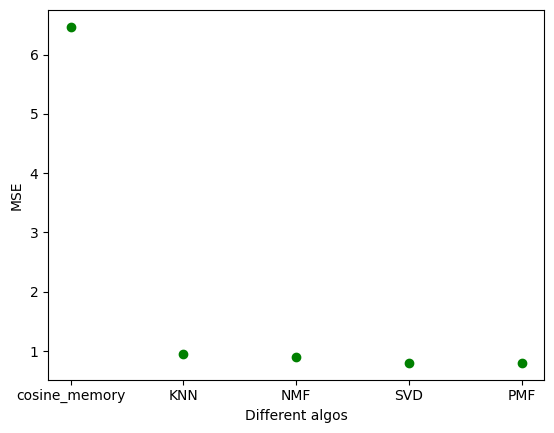

In [ ]:
mses = [6.47, .957, .897, .804, .801]
algos = ['cosine_memory', 'KNN', "NMF", 'SVD', 'PMF']
plt.plot(algos, mses, 'go',  )
plt.xlabel("Different algos")
plt.ylabel("MSE")
plt.show()

In [ ]:
import pandas as pd
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader

# Example DataFrame
ratings_dict = {'productID': list(recomm_df.productID),
                'userID': list(recomm_df.userID),
                'ratings': list(recomm_df.ratings)}
data = pd.DataFrame(ratings_dict)

def predict_similar_products(product_id, user_id, user_rating, data):
    # 'data' is the DataFrame containing user-item ratings

    # Step 1: Convert the DataFrame to a Surprise Dataset
    reader = Reader(rating_scale=(1, 5))  # Assuming ratings are on a scale of 1 to 5
    surprise_data = Dataset.load_from_df(data[['userID', 'productID', 'ratings']], reader)

    # Step 2: Train the SVD model on the entire dataset
    algo = SVD()
    trainset = surprise_data.build_full_trainset()
    algo.fit(trainset)

    # Step 3: Use the trained model to predict ratings for all other products for the given user
    testset = [(user_id, product_id, user_rating)]
    predicted_rating = algo.test(testset)[0].est

    # Step 4: Get similar products based on predicted ratings
    product_names = data['productID'].unique()
    similar_products = {}
    for prod_id in product_names:
        if prod_id != product_id:
            testset = [(user_id, prod_id, user_rating)]  # Use the same user_rating for all products
            predicted_rating = algo.test(testset)[0].est
            similar_products[prod_id] = predicted_rating

    # Sort the similar products based on predicted ratings (in descending order)
    similar_products = sorted(similar_products.items(), key=lambda x: x[1], reverse=True)

    return similar_products

# Example usage:
input_product_id = 'A2CPBQ5W4OGBX'
input_user_id = '0528881469'
input_user_rating = 2.0

similar_products = predict_similar_products(input_product_id, input_user_id, input_user_rating, data)
print(similar_products)
